In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from keras import models
from keras.models import Sequential
from keras.optimizers import Adam
import tensorflow as tf
import os
import copy
from sklearn.model_selection import train_test_split

In [2]:
# Run Noise_process before run this file
def get_dataset(obj_name):
    filename_labels = 'train_labels.npy'
    filename_origin = 'origin_cifar10.npy'
    filename_small_noise = 'small_noise_cifar10.npy'
    filename_medium_noise = 'medium_noise_cifar10.npy'
    filename_large_noise = 'large_noise_cifar10.npy'
    
    train_set = None
    match obj_name:
        case 'origin':
            train_set = np.load(filename_origin)
        case 'small_noise':
            train_set = np.load(filename_small_noise)
        case 'medium_noise':
            train_set = np.load(filename_medium_noise)
        case 'large_noise':
            train_set = np.load(filename_large_noise)
        case _:
            raise ValueError(f"Unknown obj_name: {obj_name}")
    label_set = np.load(filename_labels) if train_set.size > 0 else None

    if label_set is None or train_set is None:
        print("Run Noise_process.ipynb before run this file")
    return train_set, label_set

In [3]:
ORIGIN='origin'
SMALL='small_noise'
MEDIUM='medium_noise'
LARGE='large_noise'
all_dataset = [ORIGIN, SMALL, MEDIUM, LARGE]

In [4]:
# CNN: learning_rate, num_filter, filter_size
best_config_origin_cnn={'name': ORIGIN, 'num_filter': 128}
best_config_small_cnn={'name': SMALL, 'num_filter': 128}
best_config_medium_cnn={'name': MEDIUM, 'num_filter': 128}
best_config_large_cnn={'name': LARGE, 'num_filter': 128}
best_config_cnn=[]
best_config_cnn.append(best_config_origin_cnn)
best_config_cnn.append(best_config_small_cnn)
best_config_cnn.append(best_config_medium_cnn)
best_config_cnn.append(best_config_large_cnn)

Build Model

In [5]:
def build_simple_cnn(num_filter, learning_rate=0.0005, filter_size=(3,3), input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))  
    model.add(layers.Conv2D(num_filter, filter_size, activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
def get_processed_dataset(model_name):
    train_set, label_set = get_dataset(model_name)

    X_combined_reshaped = train_set.reshape(-1, 32, 32, 3)
    X_combined_reshaped = X_combined_reshaped.astype('float32') / 255.0
    y_combined_categorical = to_categorical(label_set, num_classes=10)

    return X_combined_reshaped, y_combined_categorical

In [7]:
def plot_learning_curves(all_history, model_name):
    train_loss = np.mean([h['loss'] for h in all_history], axis=0)
    val_loss = np.mean([h['val_loss'] for h in all_history], axis=0)
    train_accuracy = np.mean([h['accuracy'] for h in all_history], axis=0)
    val_accuracy = np.mean([h['val_accuracy'] for h in all_history], axis=0)

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f'Loss Curve {model_name} CNN')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='Train Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title(f'Accuracy Curve {model_name} CNN')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

Fold 1/20
38/38 [==============================] - 0s 10ms/step
Run origin, in small_noise at Fold 1/20: Accuracy: 0.44416666666666665, Precision: 0.5122695860698029, Recall: 0.43854436023323273
38/38 [==============================] - 0s 11ms/step
Run origin, in medium_noise at Fold 1/20: Accuracy: 0.43083333333333335, Precision: 0.48237540405908863, Recall: 0.42508192997128147
38/38 [==============================] - 0s 11ms/step
Run origin, in large_noise at Fold 1/20: Accuracy: 0.24833333333333332, Precision: 0.45902856514892426, Recall: 0.24539243169014724
Fold 2/20
38/38 [==============================] - 0s 10ms/step
Run origin, in small_noise at Fold 2/20: Accuracy: 0.48833333333333334, Precision: 0.5197492919018771, Recall: 0.4840721095656984
38/38 [==============================] - 0s 10ms/step
Run origin, in medium_noise at Fold 2/20: Accuracy: 0.46, Precision: 0.46900060326534965, Recall: 0.45502207267063566
38/38 [==============================] - 0s 10ms/step
Run origin, 

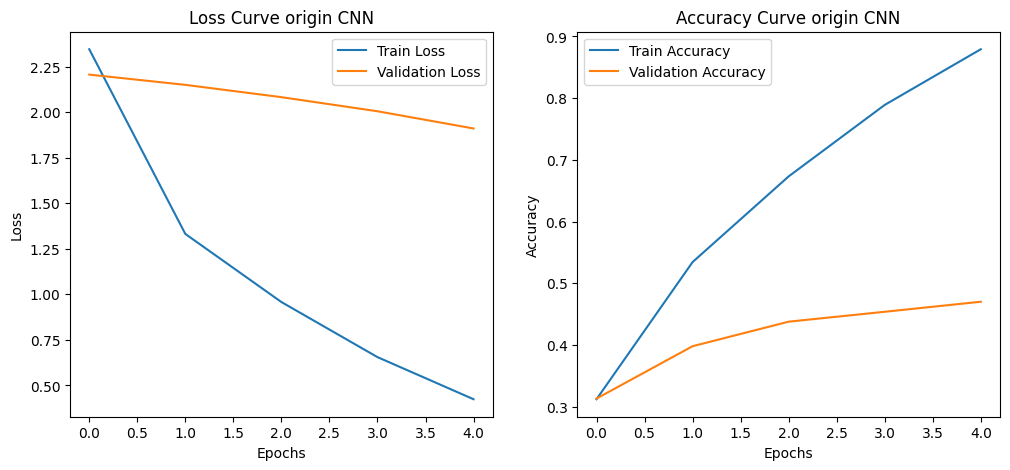

Fold 1/20
38/38 [==============================] - 0s 11ms/step
Run small_noise, in origin at Fold 1/20: Accuracy: 0.465, Precision: 0.5243977547375211, Recall: 0.47225541610195254
38/38 [==============================] - 0s 12ms/step
Run small_noise, in medium_noise at Fold 1/20: Accuracy: 0.41, Precision: 0.46711347552669336, Recall: 0.41519958636303517
38/38 [==============================] - 0s 11ms/step
Run small_noise, in large_noise at Fold 1/20: Accuracy: 0.245, Precision: 0.45070190724551173, Recall: 0.254632519776956
Fold 2/20
38/38 [==============================] - 0s 11ms/step
Run small_noise, in origin at Fold 2/20: Accuracy: 0.5075, Precision: 0.5029008179655154, Recall: 0.5001427891563116
38/38 [==============================] - 0s 11ms/step
Run small_noise, in medium_noise at Fold 2/20: Accuracy: 0.46166666666666667, Precision: 0.4529104537626575, Recall: 0.4537434543349061
38/38 [==============================] - 0s 11ms/step
Run small_noise, in large_noise at Fold 2/

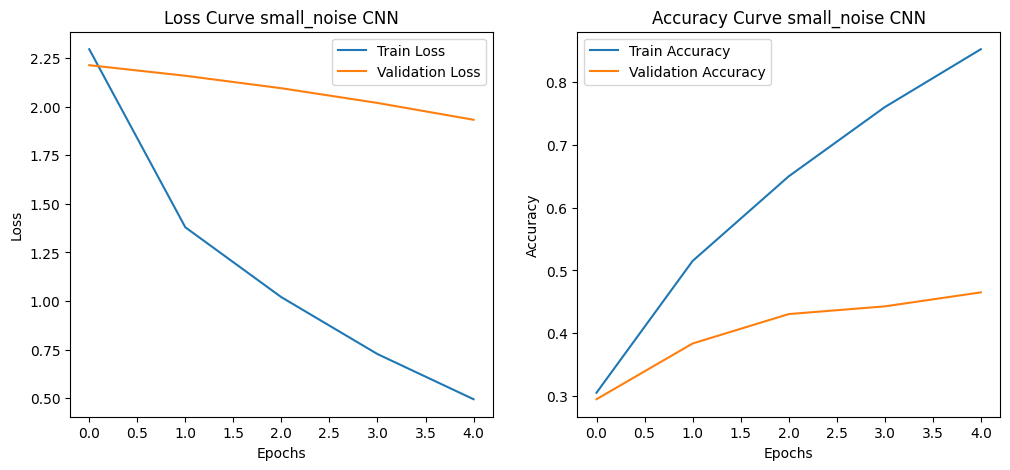

Fold 1/20
38/38 [==============================] - 0s 11ms/step
Run medium_noise, in origin at Fold 1/20: Accuracy: 0.42583333333333334, Precision: 0.48122854424989486, Recall: 0.42678912845935696
38/38 [==============================] - 0s 11ms/step
Run medium_noise, in small_noise at Fold 1/20: Accuracy: 0.3983333333333333, Precision: 0.4863139097286881, Recall: 0.3999698541939515
38/38 [==============================] - 0s 10ms/step
Run medium_noise, in large_noise at Fold 1/20: Accuracy: 0.2525, Precision: 0.34230521398857267, Recall: 0.26167740310536913
Fold 2/20
38/38 [==============================] - 0s 11ms/step
Run medium_noise, in origin at Fold 2/20: Accuracy: 0.4275, Precision: 0.49797772721468136, Recall: 0.4232511099683907
38/38 [==============================] - 0s 12ms/step
Run medium_noise, in small_noise at Fold 2/20: Accuracy: 0.4066666666666667, Precision: 0.4898125019881926, Recall: 0.40215155940841274
38/38 [==============================] - 0s 11ms/step
Run medi

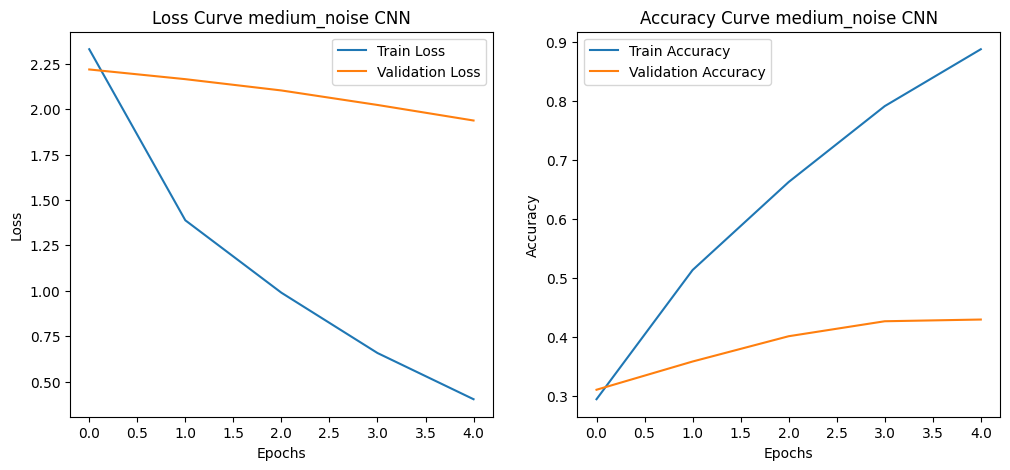

Fold 1/20
38/38 [==============================] - 0s 9ms/step
Run large_noise, in origin at Fold 1/20: Accuracy: 0.365, Precision: 0.41540215981670825, Recall: 0.350212676355823
38/38 [==============================] - 0s 9ms/step
Run large_noise, in small_noise at Fold 1/20: Accuracy: 0.4075, Precision: 0.4427507084786949, Recall: 0.39402314851692155
38/38 [==============================] - 0s 9ms/step
Run large_noise, in medium_noise at Fold 1/20: Accuracy: 0.335, Precision: 0.37853553762991066, Recall: 0.32019496140067255
Fold 2/20
38/38 [==============================] - 0s 11ms/step
Run large_noise, in origin at Fold 2/20: Accuracy: 0.3641666666666667, Precision: 0.4445282453608835, Recall: 0.35202622621789903
38/38 [==============================] - 0s 11ms/step
Run large_noise, in small_noise at Fold 2/20: Accuracy: 0.37916666666666665, Precision: 0.4678814536900534, Recall: 0.36737930944025265
38/38 [==============================] - 0s 11ms/step
Run large_noise, in medium_noi

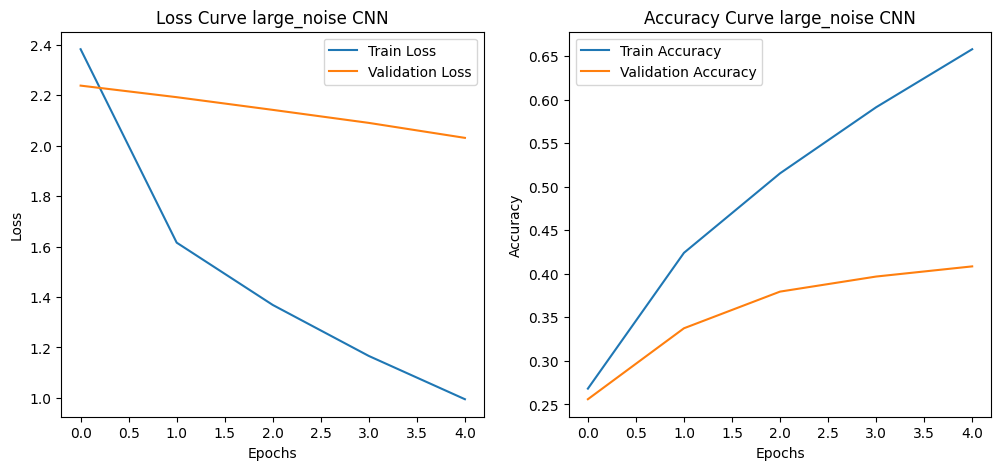

In [8]:
all_performance_cnn = {}
all_histories = {}
for config in best_config_cnn:
    model_name = config['name']

    model_performance = {}
    
    # Use 80% for cross validation and 20% for robustness test for other model
    x_processed, y_processed = get_processed_dataset(model_name)
    x_cv, _, y_cv, _ = train_test_split(x_processed, y_processed, test_size=0.2, random_state=42)

    # Cross Validation
    kf = KFold(n_splits=20, shuffle=True, random_state=42)
    all_history = []

    for fold, (train_index, val_index) in enumerate(kf.split(x_cv)):
        print(f'Fold {fold + 1}/{20}')

        model = build_simple_cnn(config['num_filter'])

        x_train, x_val = x_cv[train_index], x_cv[val_index]
        y_train, y_val = y_cv[train_index], y_cv[val_index]

        history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_val, y_val), verbose=0)
        all_history.append(history.history)
        model_performance_fold = {}
        # Robustness Test
        for dataset_name in all_dataset:
            if dataset_name == model_name:
                # Do robustness evaluations on other dataset
                continue
            # Get rest part of dataset which never used on Cross Validation
            x_evaluated, y_evaluated = get_processed_dataset(dataset_name)
            _, x_test, _, y_test = train_test_split(x_evaluated, y_evaluated, test_size=0.2, random_state=42)

            y_pred = model.predict(x_test)
            y_pred_classes = np.argmax(y_pred, axis=1)
            y_true_classes = np.argmax(y_test, axis=1) 

            accuracy = accuracy_score(y_true_classes, y_pred_classes)
            precision = precision_score(y_true_classes, y_pred_classes, average='macro', zero_division=0)
            recall = recall_score(y_true_classes, y_pred_classes, average='macro')

            print(f"Run {model_name}, in {dataset_name} at Fold {fold + 1}/{20}: Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")
            
            model_performance_fold[dataset_name] = {'accuracy' : accuracy, 'precision' : precision, 'recall' : recall}
        model_performance[fold+1] = model_performance_fold

    all_performance_cnn[model_name] = model_performance

    plot_learning_curves(all_history, model_name)
    all_histories[model_name] = all_history

    
    





In [9]:
all_performance_cnn[SMALL][1][ORIGIN]

{'accuracy': 0.465,
 'precision': 0.5243977547375211,
 'recall': 0.47225541610195254}

In [10]:
def show_plt(data_dict, name):
    noise_levels = list(data_dict.keys())
    accuracy = [data_dict[noise]['accuracy'] for noise in noise_levels]
    precision = [data_dict[noise]['precision'] for noise in noise_levels]
    recall = [data_dict[noise]['recall'] for noise in noise_levels]

    x = np.arange(len(noise_levels)) 
    width = 0.23

    plt.figure(figsize=(7, 6))

    bars1 = plt.bar(x - width, accuracy, width, label='Accuracy')
    bars2 = plt.bar(x, precision, width, label='Precision')
    bars3 = plt.bar(x + width, recall, width, label='Recall')

    for bars in (bars1, bars2, bars3):
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.3f}', ha='center', va='bottom')

    plt.title(f'Model Performance under Different Noise Levels for {name} model')
    plt.xlabel('Noise Level')
    plt.ylabel('Score')
    plt.xticks(x, noise_levels) 
    plt.ylim(0, 0.6)  
    plt.legend()
    plt.grid(axis='y') 
    plt.tight_layout()

    plt.show()

In [11]:
all_metrics = {}
for model_name in all_dataset:
    dataset_record = {}
    for dataset_name in all_dataset:
        if dataset_name == model_name:
            continue
        dataset_record[dataset_name] = {'accuracy':[], 'precision':[], 'recall':[]}
    all_metrics[model_name] = dataset_record
    for i in range(1, 21):
        for dataset in all_dataset:
            if model_name != dataset:
                dataset_record[dataset]['accuracy'].append(all_performance_cnn[model_name][i][dataset]['accuracy'])
                dataset_record[dataset]['precision'].append(all_performance_cnn[model_name][i][dataset]['precision'])
                dataset_record[dataset]['recall'].append(all_performance_cnn[model_name][i][dataset]['recall'])

In [12]:
for model_name in all_dataset:
    for dataset_name in all_dataset:
        if dataset_name == model_name:
            continue
        all_metrics[model_name][dataset_name]['accuracy'] = np.mean(all_metrics[model_name][dataset_name]['accuracy'])
        all_metrics[model_name][dataset_name]['precision'] = np.mean(all_metrics[model_name][dataset_name]['precision'])
        all_metrics[model_name][dataset_name]['recall'] = np.mean(all_metrics[model_name][dataset_name]['recall'])

all_metrics[ORIGIN]

{'small_noise': {'accuracy': 0.45275,
  'precision': 0.5076723437522458,
  'recall': 0.44866904501541194},
 'medium_noise': {'accuracy': 0.44749999999999995,
  'precision': 0.47725838250277974,
  'recall': 0.44334181152733293},
 'large_noise': {'accuracy': 0.24337499999999998,
  'precision': 0.3701909554269931,
  'recall': 0.243574259968722}}

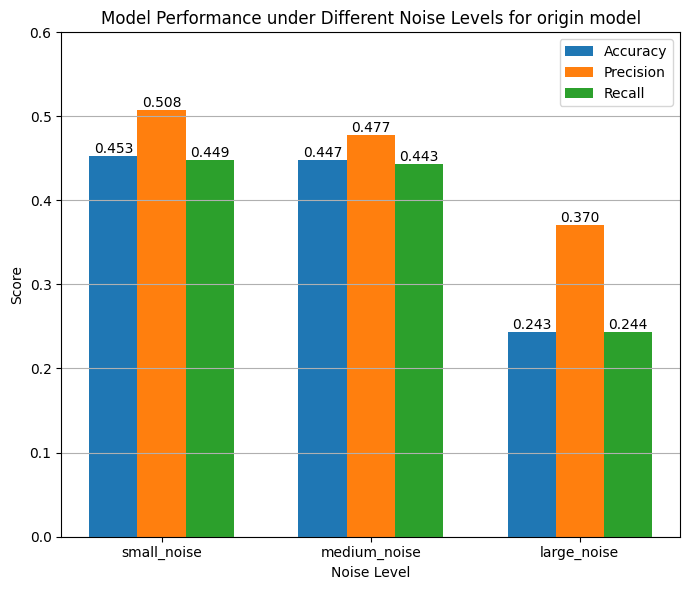

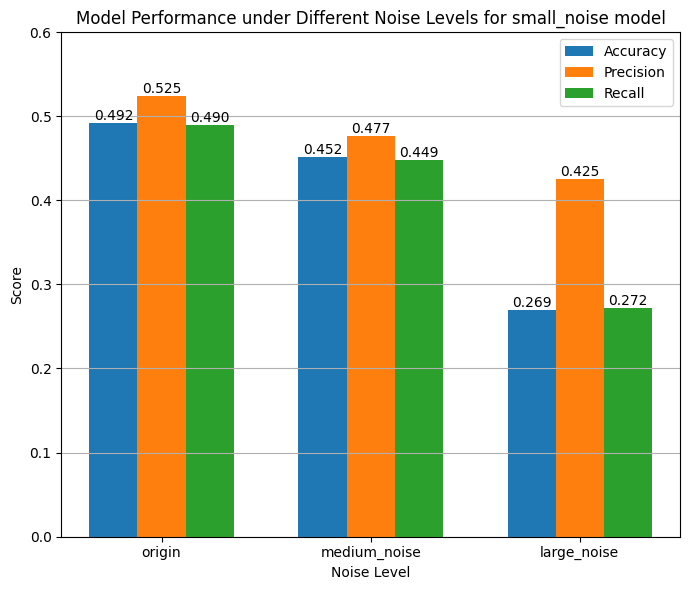

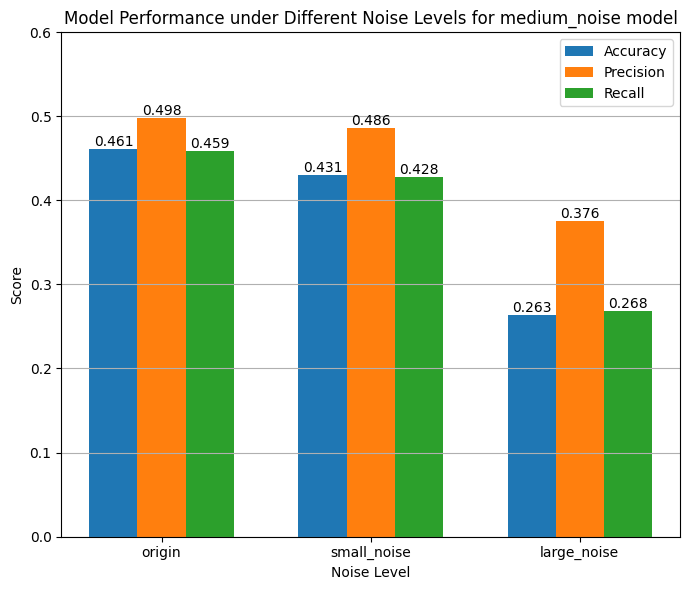

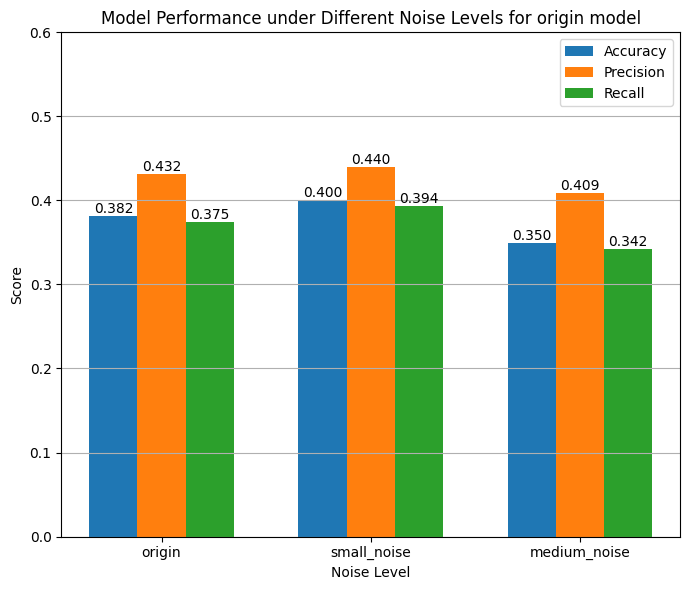

In [13]:
show_plt(all_metrics[ORIGIN], ORIGIN)
show_plt(all_metrics[SMALL], SMALL)
show_plt(all_metrics[MEDIUM], MEDIUM)
show_plt(all_metrics[LARGE], ORIGIN)

Store all_metrics

In [14]:
import json
with open('metrics.json', 'w') as json_file:
    json.dump(all_metrics, json_file)

In [15]:
with open('metrics.json', 'r') as json_file:
    loaded_metrics = json.load(json_file)

print(loaded_metrics)  

{'origin': {'small_noise': {'accuracy': 0.45275, 'precision': 0.5076723437522458, 'recall': 0.44866904501541194}, 'medium_noise': {'accuracy': 0.44749999999999995, 'precision': 0.47725838250277974, 'recall': 0.44334181152733293}, 'large_noise': {'accuracy': 0.24337499999999998, 'precision': 0.3701909554269931, 'recall': 0.243574259968722}}, 'small_noise': {'origin': {'accuracy': 0.49179166666666657, 'precision': 0.5246073643274628, 'recall': 0.48988190086565364}, 'medium_noise': {'accuracy': 0.45183333333333336, 'precision': 0.4768390614839605, 'recall': 0.44852682543077166}, 'large_noise': {'accuracy': 0.26925000000000004, 'precision': 0.42531262220848437, 'recall': 0.27158448050843775}}, 'medium_noise': {'origin': {'accuracy': 0.4609166666666667, 'precision': 0.49785897334129514, 'recall': 0.45856332292492574}, 'small_noise': {'accuracy': 0.43083333333333335, 'precision': 0.48636389091426285, 'recall': 0.42791139901059394}, 'large_noise': {'accuracy': 0.2632083333333333, 'precision':